In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
import plotly .express as px
import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv("car data.csv")

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

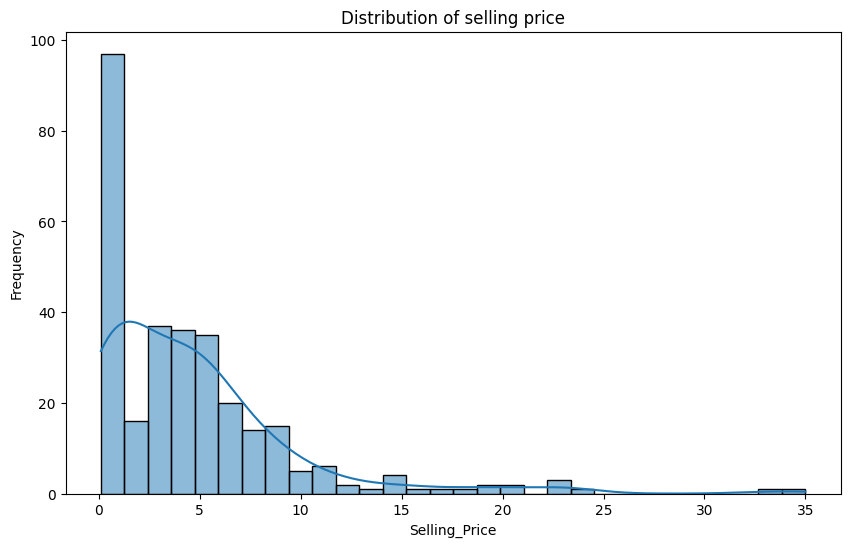

In [ ]:
#visualisation of selling_price

plt.figure(figsize=(10,6))
sns.histplot(df["Selling_Price"],bins=30,kde=True)
plt.title("Distribution of selling price")
plt.xlabel("Selling_Price")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

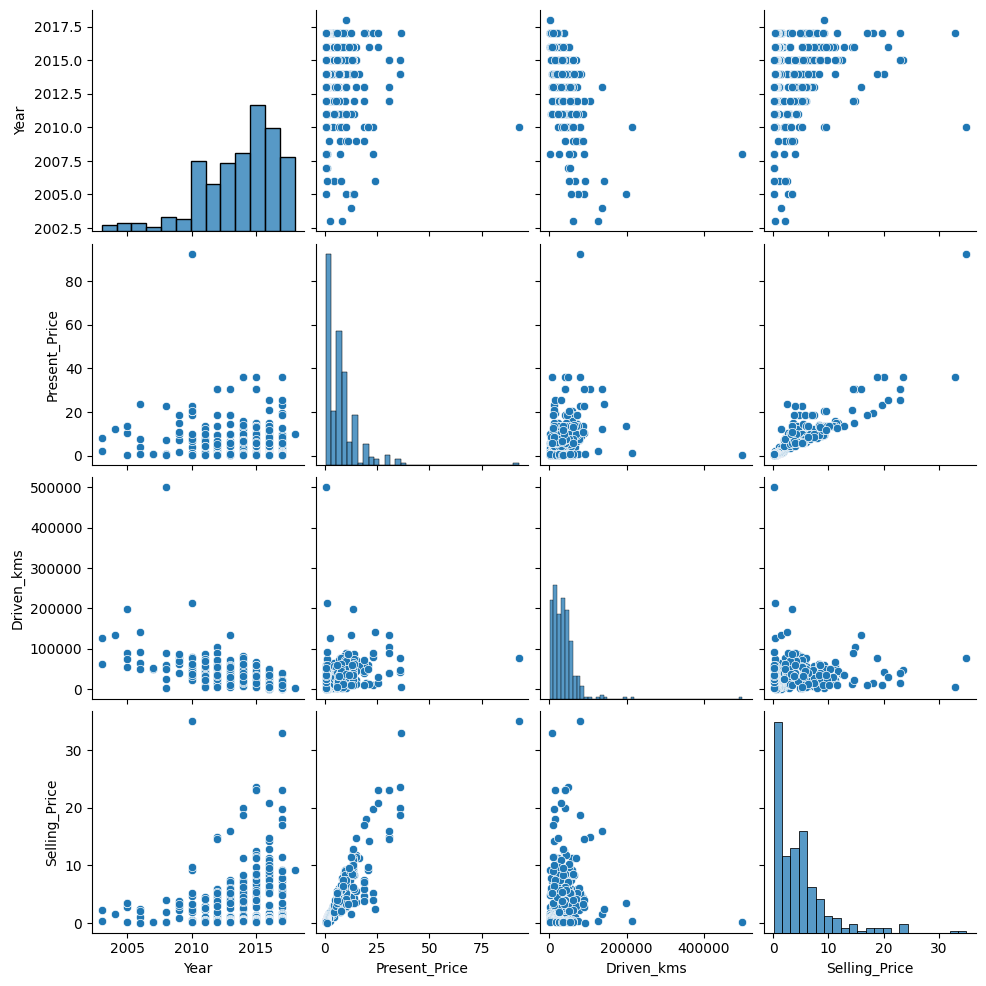

In [ ]:
sns.pairplot(df, vars=["Year", "Present_Price", "Driven_kms", "Selling_Price"], palette="Dark2")
plt.show()


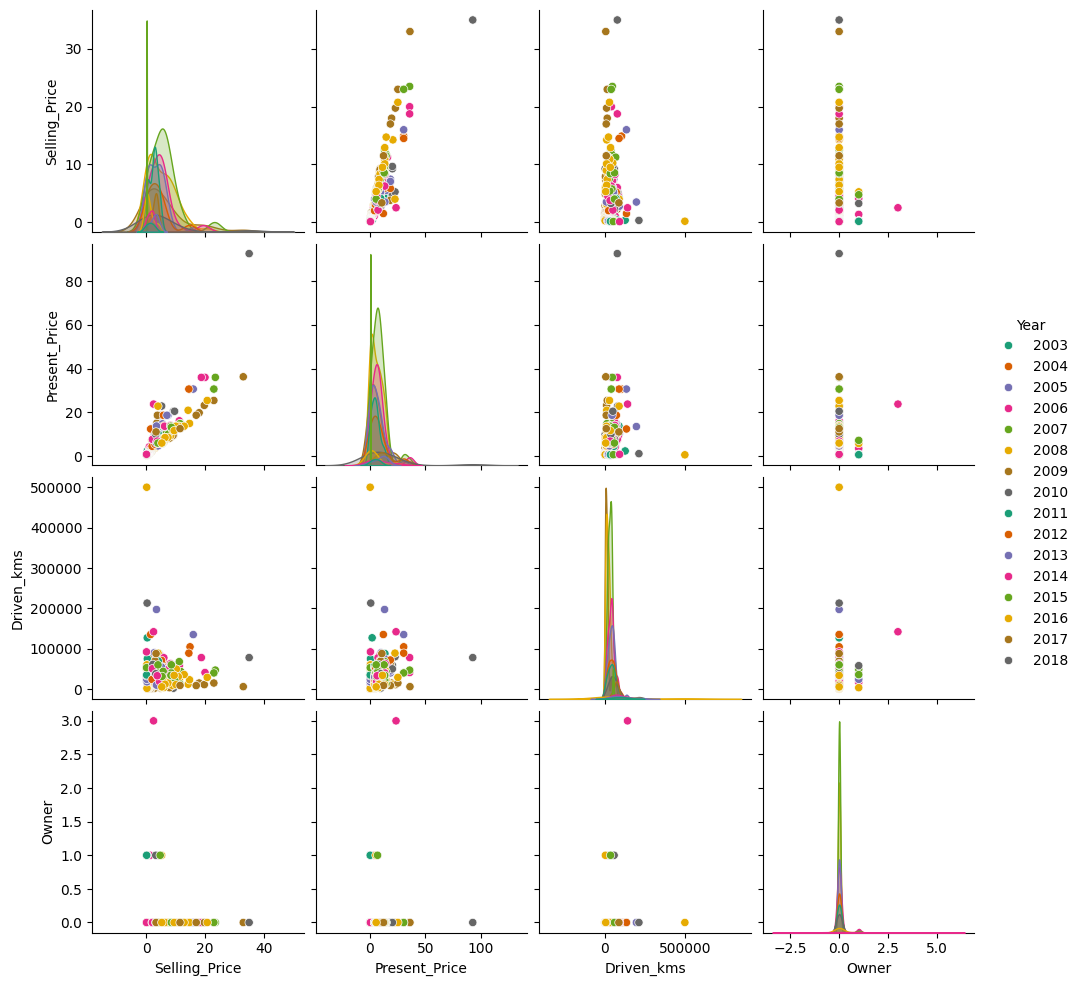

In [ ]:
sns.pairplot(df,hue="Year",palette="Dark2")
plt.show()

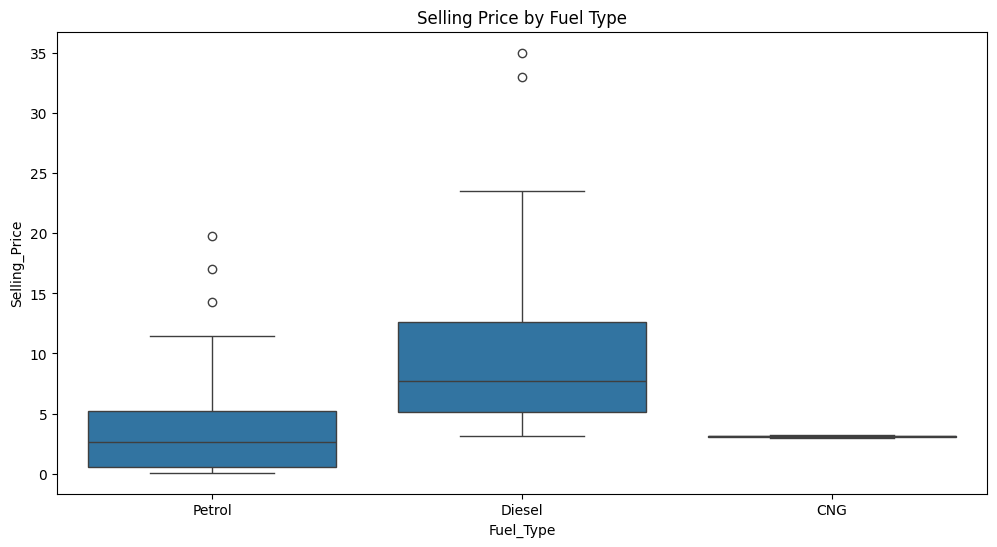

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Fuel_Type",y="Selling_Price",data=df)
plt.title("Selling Price by Fuel Type")
plt.show()

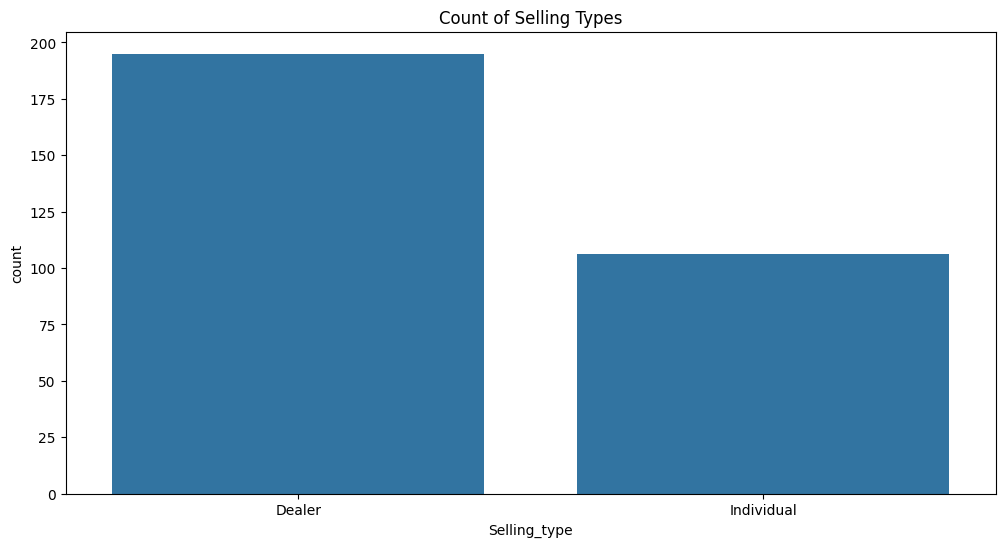

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x="Selling_type",data=df)
plt.title("Count of Selling Types")
plt.show()

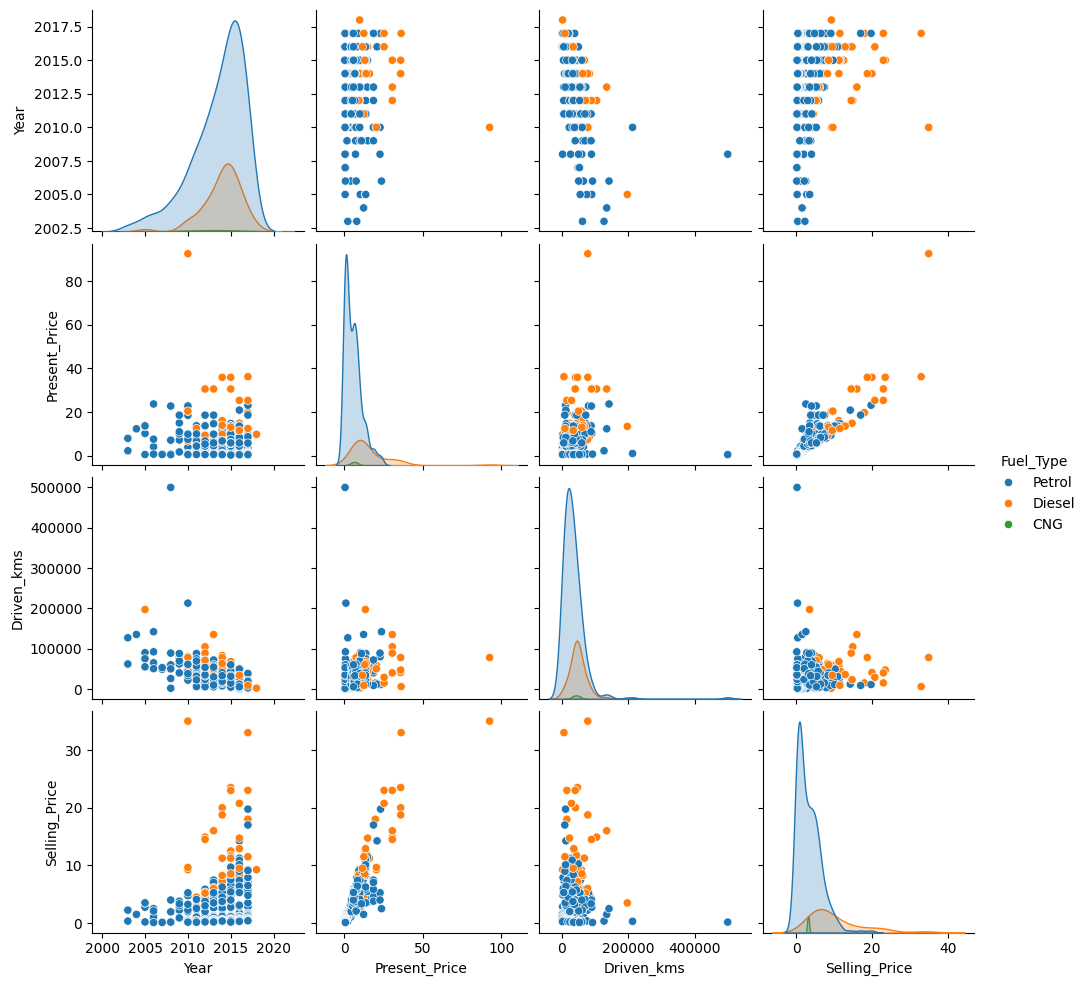

In [38]:
sns.pairplot(df,vars=["Year", "Present_Price", "Driven_kms", "Selling_Price"],hue="Fuel_Type")
plt.show()

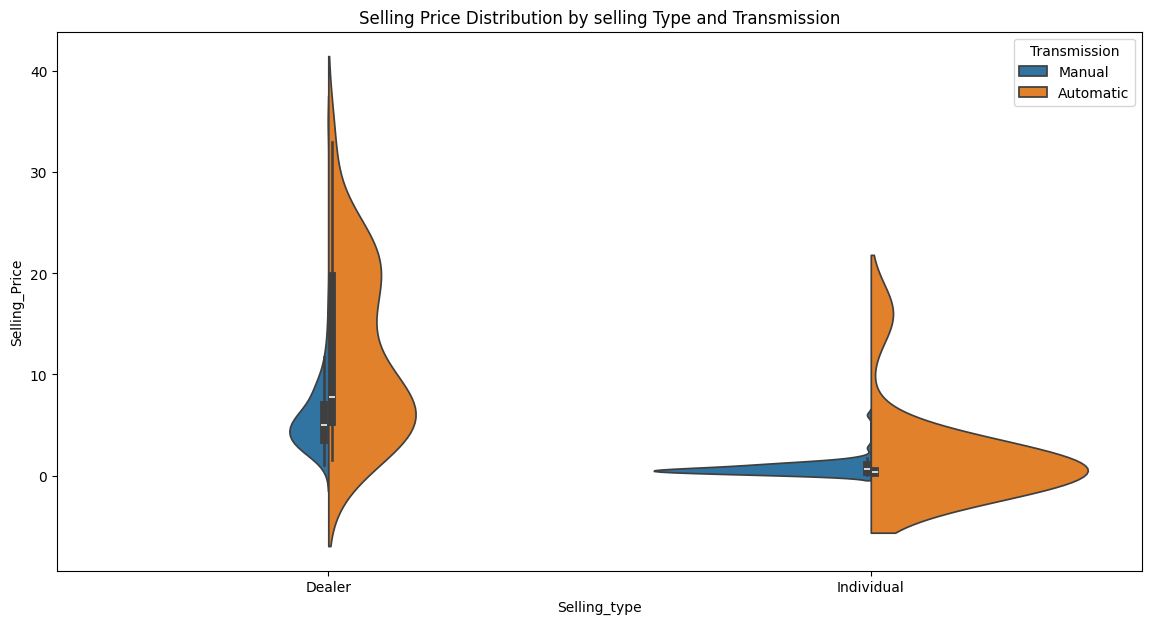

In [39]:
plt.figure(figsize=(14,7))
sns.violinplot(x="Selling_type",y="Selling_Price",hue="Transmission",data=df,split=True)
plt.title("Selling Price Distribution by selling Type and Transmission")
plt.show()

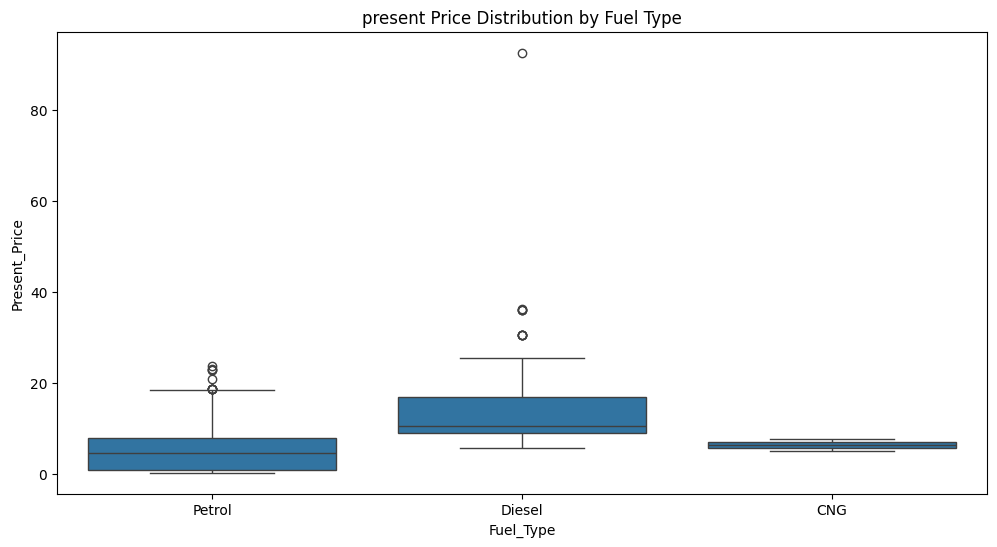

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Fuel_Type",y="Present_Price",data=df)
plt.title("present Price Distribution by Fuel Type")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [48]:
features=["Year","Present_Price","Driven_kms","Fuel_Type","Selling_type","Transmission"]
target="Selling_Price"
x=df[features]
y=df[target]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
numeric_features=["Year","Present_Price","Driven_kms"]
numeric_transformer=Pipeline(steps=[
    ("scaler",StandardScaler())
])

categorical_features=["Fuel_Type","Selling_type","Transmission"]
categorical_transformer=Pipeline(steps=[
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

preprocessor= ColumnTransformer(
    transformers=[
        ("num",numeric_transformer,numeric_features),
        ("cat",categorical_transformer,categorical_features)
    ]
)

model=Pipeline(steps=[("preprocessor",preprocessor),
                      ("regressor",RandomForestRegressor(random_state=42))])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [55]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse}")
print(f"R-squared:{r2}")

Mean Squared Error:0.8723871159016386
R-squared:0.9621287180651648


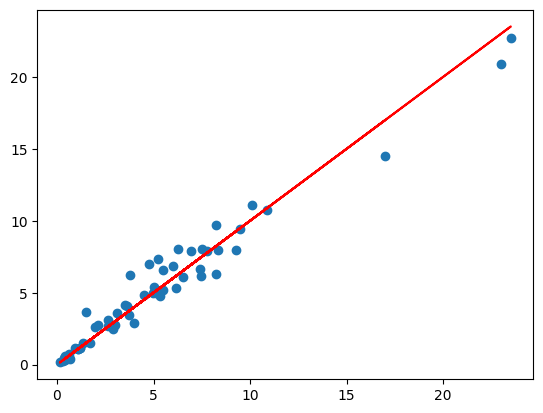

In [50]:
#Our Predictions
plt.scatter(y_test,y_pred)

#Perfect Predictions
plt.plot(y_test,y_test,)